# Introduction to PyTorch
## Introduction
__PyTorch__ is a popular Python based computational graph framework to implement deep learning algorithms.

The sequence analysis or temporal information can be captured by a special class of artificial neural networks, called recurrent neural network (RNN), where connections between nodes form a directed graph along a sequence. Unlike feedforward neural networks, RNNs can use their internal state (memory) to process sequences of inputs. This makes them applicable to tasks such as unsegmented, connected speech recognition and natural language processing. PyTorch stands out among other neural network frameworks by its simpler programming and RNN capabilities.

The general machine learning pipelines can be seen as a data flow architecture where the input vectors are transformed by the model (a mathematical expression) to obtain predictions, and the loss function (e.g. the error difference between the intermediate model output and the actual desired output) to provide a feedback signal to adjust the parameters of the model. This data flow can be conveniently implemented using the computational graph data structure.

Technically, a computational graph is an abstraction that models mathematical expressions.

Consider the expression: $y=w x+b$

This equation can be written as two subexpressions, $z=w x$ and $y=z+b$.

We can then represent the original expression using a Directed Acyclic Graph (DAG) in which the nodes are the mathematical operators, e.g. multiplication and addition. The inputs to the operations are the incoming graph edges to the nodes and the output of each operation is the outgoing edge.

## Basics
At the core of the PyTorch library is the tensor $\mathbf{T}$, which is a mathematical object holding multidimensional data.

A tensor of order zero is a scalar (e.g. a `real` number).

A tensor of order one ($1^{\text {st}}$ order tensor) is a one-dimensional vector or an array of $M$ many numbers, i.e. $\mathbf{T} \in \mathbb{R}^{M}$.

Similarly, a $2^{\mathrm{nd}}$ order tensor is an array of vectors, or an $M \times M$ matrix, i.e. $\mathbf{T} \in \mathbb{R}^{M \times M}$.

Therefore, a tensor can be generalized as an n-dimensional array of scalars, i.e. n-dimensional tensor = $\mathbf{T} \in \mathbb{R}^{M \times M \times \ldots \times M}$

Note that, for simplicity each data size is set to $M$ above, but this can be easily changed to any value in PyTorch framework, similar to `numpy` multidimensional arrays.

---

Use a separate Anaconda environment for PyTorch:  
`conda create -n torch pytorch jupyter matplotlib pandas scikit-learn`  
`conda activate torch`  

Run this notebook under the virtual environment `torch`.

---

PyTorch API: https://pytorch.org/docs/stable/index.html

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import torch

print(f'PyTorch version= {torch.__version__}')
print(f'CUDA available= {torch.cuda.is_available()}')

PyTorch version= 1.6.0
CUDA available= False


In [25]:
# A helper function to display properties of the Python objects
def describe(x):
    print(f"Type= {x.type()}")
    print(f"Shape/size= {x.shape}")
    print(f"Values= {x}")

# Random tensor, has dummy values from the computer memory - not initialized
describe(torch.Tensor(2, 3))

Type= torch.FloatTensor
Shape/size= torch.Size([2, 3])
Values= tensor([[-2.8103e-30,  4.5773e-41,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00]])


In [26]:
x = torch.ones(2, 3)
describe(x)

# Initialization
x.fill_(5)
describe(x)

Type= torch.FloatTensor
Shape/size= torch.Size([2, 3])
Values= tensor([[1., 1., 1.],
        [1., 1., 1.]])
Type= torch.FloatTensor
Shape/size= torch.Size([2, 3])
Values= tensor([[5., 5., 5.],
        [5., 5., 5.]])


In [27]:
# Initialize from a numpy array
np_array = np.random.rand(2, 3)
describe(torch.from_numpy(np_array))

Type= torch.DoubleTensor
Shape/size= torch.Size([2, 3])
Values= tensor([[0.8300, 0.5134, 0.6781],
        [0.1465, 0.4535, 0.5959]], dtype=torch.float64)


In [28]:
# Initialization using arange
x = torch.arange(6)
describe(x)

Type= torch.LongTensor
Shape/size= torch.Size([6])
Values= tensor([0, 1, 2, 3, 4, 5])


In [29]:
# Convert shape (1,6) to shape (2,3)
x = x.view(2, 3)
describe(x)

Type= torch.LongTensor
Shape/size= torch.Size([2, 3])
Values= tensor([[0, 1, 2],
        [3, 4, 5]])


In [30]:
# Sum values on dimension 0, i.e. vertically on columns
describe(torch.sum(x, dim=0))

Type= torch.LongTensor
Shape/size= torch.Size([3])
Values= tensor([3, 5, 7])


In [31]:
# Sum values on dimension 1, i.e. horizontally on rows
describe(torch.sum(x, dim=1))

Type= torch.LongTensor
Shape/size= torch.Size([2])
Values= tensor([ 3, 12])


In [32]:
# Transpose of the matrix
describe(torch.transpose(x, 0, 1))

Type= torch.LongTensor
Shape/size= torch.Size([3, 2])
Values= tensor([[0, 3],
        [1, 4],
        [2, 5]])


In [33]:
# Slicing works similarly to numpy
describe(x)
describe(x[:1, :2])

Type= torch.LongTensor
Shape/size= torch.Size([2, 3])
Values= tensor([[0, 1, 2],
        [3, 4, 5]])
Type= torch.LongTensor
Shape/size= torch.Size([1, 2])
Values= tensor([[0, 1]])


---

## Computational Graphs
PyTorch tensor class encapsulates the data (the tensor itself) and a range of operations, such as algebraic operations, indexing, and reshaping operations. When the `requires_grad` Boolean flag is set to True on a tensor, bookkeeping operations are enabled that can track the gradient at the tensor as well as the gradient function, both of which are needed to facilitate the gradient based deep learning. Recall that a neural network is _trained_ by minimizing the error between the output and the target output values by an optimization process where generally a gradient based approach is used since the optimization problem is __non-convex__ and require a greedy optimization approach.

__Important:__ Running the following cells multiple times will fail as the intermediate gradients are computed with the current data and consecutive runs will receive no data.

In [34]:
# Create a 2 by 2 matrix, all ones
x = torch.ones(2, 2, requires_grad=True)
describe(x)

print(x.grad is None)

Type= torch.FloatTensor
Shape/size= torch.Size([2, 2])
Values= tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
True


In [35]:
# Define a linear computation
y = (x+2) * (x+5) + 3
describe(y)

print(x.grad is None)

Type= torch.FloatTensor
Shape/size= torch.Size([2, 2])
Values= tensor([[21., 21.],
        [21., 21.]], grad_fn=<AddBackward0>)
True


In [36]:
# Take mean of y, gradient is none
z = y.mean()
describe(z)

z.backward()

print(x.grad is None)

Type= torch.FloatTensor
Shape/size= torch.Size([])
Values= 21.0
False


When a tensor with `requires_grad=True` is created, PyTorch manages the bookkeeping that computes the gradients. First, PyTorch will keep track of the values of the forward pass. Then, at the end of the computations, a single scalar is used to compute a backward pass. The backward pass is initiated by using the `backward()` method on a tensor resulting from the evaluation of a __loss function__. The backward pass computes a gradient value for a tensor object that participated in the forward pass.

In general, the gradient is a value that represents the slope of a function output with respect to the function input. In the computational graph, gradients exist for each model parameter and can be thought of as the parameter's contribution to the error signal. The gradients for the nodes in the computational graph are accessible by using the `.grad` member variable. Optimizers use the `.grad` variable to update the values of the parameters.

---

## Perceptron Re-visited
Each perceptron has an input $x$, an output $y$, and a set of weights $w$, a bias $b$, and an activation function $f$. The weights and the bias are __learned__ from the data, and the activation function is handpicked depending on the neural network model designer's intuition of the network and its target outputs.

$y=f(w x+b)$

Generally more than one feature is used, thus $x \in \mathbb{R}^{M}$, $w \in \mathbb{R}^{M}$, and $b \in \mathbb{R}$, where there are $M$ features.

The activation function, denoted by f is typically a nonlinear function. Thus, a perceptron is a composition of a linear and a nonlinear function. The linear expression $w x+b$ is also known as the __affine transformation__ which preserves points, straight lines and planes. Some affine transformations include translation, scaling, reflection, rotation, etc., and compositions of them. 

In [37]:
import torch.nn as nn

class Perceptron(nn.Module):
    """ A perceptron is one linear layer """
    def __init__(self, input_dim):
        """
        Args:
            input_dim (int): size of the input features
        """
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1)

    def forward(self, x_in):
        """ The forward pass of the perceptron
        Args:
            x_in (torch.Tensor): an input data tensor
            x_in.shape should be (batch, num_features)
        Returns:
            the resulting tensor. tensor.shape should be (batch,).
        """
        return torch.sigmoid(self.fc1(x_in)).squeeze()

---

## Activation functions

Activation functions are nonlinear decision making stages to make sure the neural network can indeed approximate a function that models the input and output relation.

### Sigmoid
sigmoid $:(-\infty, \infty) \rightarrow[0,1] \quad \operatorname{sigmoid}(x)=\frac{1}{1+e^{-x}}$

### Tanh
$\tanh :(-\infty, \infty) \rightarrow[-1,1] \quad \tanh (x)=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$

### ReLU
The most popular activation function also called as rectified linear unit.

relu $:(-\infty, \infty) \rightarrow[0, \infty) \quad \operatorname{relu}(x)=\max (0, x)$

The clipping effect of ReLU that helps with the vanishing gradient problem can also become an issue where over time certain outputs in the network can simply become zero and never revive again. This is called the "dying ReLU" problem. To mitigate that effect, variants such as the Leaky ReLU and Parametric ReLU (PReLU) activation functions have proposed, where the leak coefficient $a$ is a learned parameter.

PReLU: $f(x)=\max (a x, x)$

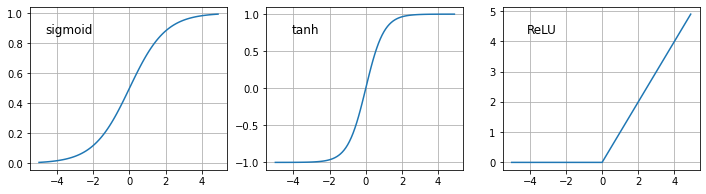

In [38]:
x = torch.arange(-5, 5, .1)
y1 = torch.sigmoid(x)
y2 = torch.tanh(x)
y3 = torch.relu(x)

plt.figure(figsize=(12, 3))

ax=plt.subplot(1, 3, 1); ax.grid(); plt.title("sigmoid", x=0.2, y=0.8)
ax.plot(x.numpy(), y1.numpy())

ax=plt.subplot(1, 3, 2); ax.grid(); plt.title("tanh", x=0.2, y=0.8)
ax.plot(x.numpy(), y2.numpy())

ax=plt.subplot(1, 3, 3); ax.grid(); plt.title("ReLU", x=0.2, y=0.8)
ax.plot(x.numpy(), y3.numpy())

plt.show()

## Softmax
Like the sigmoid function, the softmax function squashes the output of each unit to be between 0 and 1. In addition, the softmax also divides each output by the sum of all the outputs, which gives us a discrete probability distribution over $K$ possible classes. The values in the resulting distribution all sum up to one, like a probability.

$\operatorname{softmax}\left(x_{i}\right)=\frac{e^{x_{i}}}{\sum_{j=1}^{K} e^{x_{j}}}$

In [39]:
# Check the softmax output 
softmax = nn.Softmax(dim=1)
x_input = torch.randn(1, 3)
y_output = softmax(x_input)

print(x_input)
print(y_output)
print(torch.sum(y_output, dim=1))

tensor([[-1.1513,  0.5416, -1.2750]])
tensor([[0.1366, 0.7426, 0.1207]])
tensor([1.])


---

## Loss Functions
Another piece we require to build learning computation graphs is the loss functions or objective functions. The training algorithm picks the correct (fitting) parameters by evaluating the loss function.

Recall that we have used a loss function as the sum of difference between the truth $y$ and the (intermediate) prediction $\hat{y}$. The higher this difference, the worse the model prediction.

### Mean Squared Error Loss (L2)
Similar to linear regression, the network's output $\hat{y}$ and the target $y$ are real valued number and their difference is used as the loss/error/cost:

$\mathbf{L}_{\mathrm{MSE}}=\frac{1}{n} \sum_{i=1}^{n}(y-\hat{y})^{2}$

In [40]:
# Demonstrate MSE loss
mse_loss = nn.MSELoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.randn(3, 5)

loss = mse_loss(outputs, targets)

print(loss)

tensor(0.9047, grad_fn=<MseLossBackward>)


## Categorical Cross-Entropy Loss
The categorical cross-entropy (CCE) loss is typically used in a multi-class classification problem in which the outputs are interpreted as predictions of class membership probabilities. The target $y$ is a vector of $K$ elements that represents the true multinomial distribution over all the classes. If only one class is correct or permitted, then this vector is a one-hot vector. The network's output $\hat{y}$ is also a vector of $K$ elements and represents the network's prediction of the multinomial distribution.

$\mathbf{L}_{\text {cross-entropy }}(y, \hat{y})=-\sum_{c=1}^{K} y_{c} \log \left(\hat{y}_{c}\right)$

Best to use categorical cross-entropy in classification problems where only one result can be correct.

## Binary Cross-Entropy Loss
The binary cross-entropy (BCE) is the binary version of the CCE.

In [41]:
# Demonstrate CCE loss
ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.tensor([1, 0, 3], dtype=torch.int64)

loss = ce_loss(outputs, targets)

print(loss)

tensor(2.5634, grad_fn=<NllLossBackward>)


In [42]:
# Demonstrate BCE loss
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
probabilities = sigmoid(torch.randn(4, 1, requires_grad=True))
targets = torch.tensor([1, 0, 1, 0], dtype=torch.float32).view(4, 1)

loss = bce_loss(probabilities, targets)

print(probabilities)
print(loss)

tensor([[0.5948],
        [0.4731],
        [0.6715],
        [0.7550]], grad_fn=<SigmoidBackward>)
tensor(0.7412, grad_fn=<BinaryCrossEntropyBackward>)


---
## Supervised Learning with PyTorch
Once the network is constructed, and loss function is picked, an optimizer is chosen which can update the model parameters and fit to the training data.

A single `hyperparameter` that controls the network parameter update behavior of the optimizer is called the learning rate `eta`, controls how much impact the error signal has on updating the weights.

Two popular optimizers in PyTorch are Stochastic Gradient Descent (SGD), and Adam.

In [43]:
# Demonstrate the Adam optimizer
import torch.optim as optim

input_dim = 2
learning_rate = 0.001  # this must be found by a hyper-parameter search

perceptron = Perceptron(input_dim=input_dim)  # defined above
bce_loss = nn.BCELoss()  # Binary cross entropy loss
optimizer = optim.Adam(params=perceptron.parameters(), lr=learning_rate)

print(optimizer)

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)


### Training
In batches, by a particular learning rate, for so many epochs:  
1\. Zero the gradients  
2\. Compute the output  
3\. Compute the loss
4\. Use loss to produce gradients
5\. Use optimizer to take gradient step

---

## Example
Using Tf-Idf features let's see how we would classify programming languages.

The dataset is composed of Stackoverflow website (https://stackoverflow.com/) posts about 20 different programming languages.

We will use 1000 features to keep the classifier model small, and still have very good results.

First let's see the SVM performance:

In [44]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv('datasets/module05_stack_overflow_data.csv')
df = df[pd.notnull(df['tags'])]
print(f"Number of words= {df['post'].apply(lambda x: len(x.split(' '))).sum()}")

plCats = np.unique(df['tags'])
print(f"K categories={len(plCats):d} {plCats}")

X_tfidf = TfidfVectorizer(dtype=np.float32, max_features=1000).fit_transform(df.post).todense()
print(f"N data points= {X_tfidf.shape[0]}, M features= {X_tfidf.shape[1]}")

Number of words= 10286120
K categories=20 ['.net' 'android' 'angularjs' 'asp.net' 'c' 'c#' 'c++' 'css' 'html' 'ios'
 'iphone' 'java' 'javascript' 'jquery' 'mysql' 'objective-c' 'php'
 'python' 'ruby-on-rails' 'sql']
N data points= 40000, M features= 1000


In [45]:
def kfold_eval_docs(_clf, _Xdocs, _ydocs):
    from sklearn.model_selection import StratifiedKFold
    from sklearn.metrics import accuracy_score

    # Need indexable data structure
    acc = []
    kf = StratifiedKFold(n_splits=10, shuffle=False, random_state=None)
    for train_index, test_index in kf.split(_Xdocs, _ydocs):
        _clf.fit(_Xdocs[train_index], _ydocs[train_index])
        y_pred = _clf.predict(_Xdocs[test_index])
        acc += [accuracy_score(_ydocs[test_index], y_pred)]
    return np.array(acc)

In [46]:
%%time
from sklearn.svm import LinearSVC

acc = kfold_eval_docs(LinearSVC(class_weight='balanced'), X_tfidf, df.tags)

print(f"Linear SVM 10-fold CV accuracy= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}")

Linear SVM 10-fold CV accuracy= 0.79 ±0.005
CPU times: user 32.2 s, sys: 1.95 s, total: 34.2 s
Wall time: 27.1 s


Now, let's build the neural network classifier:
* In our neural network, let's have 1 hidden layer of size  100
* Note that our input size $M$ is  1000 which are the columns of the Tf-Idf matrix or top words (i.e. features)
* And we have 20 categories as output/target in the programming languages dataset
* Let's also use ReLU activation function and a softmax output function
* Use a CCE loss function, `CrossEntropyLoss`

In [47]:
import torch.nn as nn
import torch.nn.functional as F

class MyNetwork(nn.Module):
    """ A PyTorch neural network model """
    def __init__(self):
        super(MyNetwork, self).__init__()
        self.fc1 = nn.Linear(1000, 100)  # A simple input layer
        self.fc2 = nn.Linear( 100, 100)  # A simple hidden layer
        self.fc3 = nn.Linear( 100,  20)  # A simple output layer

    def forward(self, x, apply_softmax=False):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        if apply_softmax:
            x = F.softmax(x, dim=1)
        return x

In [48]:
# Instantiate the neural network
Net1 = MyNetwork()
print(Net1)

# Set the learning rate - this part is magic of course
eta = 0.05

MyNetwork(
  (fc1): Linear(in_features=1000, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=20, bias=True)
)


Create the optimizer as Stochastic Gradient Descent.

In [49]:
# Create a Stochastic Gradient Descent optimizer
optimizer = optim.SGD(Net1.parameters(), lr=eta, momentum=0.9)

# Create the loss function
loss_func = nn.CrossEntropyLoss()

Prepare the data arrays as Tensors.

__Important:__ PyTorch requires class labels (integers) being `int64`, e.g. the `y` vector.

Also use a validation dataset to measure generalization performance (pulled as 10% of training dataset).

In [50]:
from sklearn.model_selection import train_test_split

# Class labels (integers) are int64 for PyTorch
y_tfidf = np.array(df.tags.astype('category').cat.codes, dtype='int64')

# Use validation to measure generalization performance
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_tfidf, test_size=0.3)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

In [51]:
# Convert to tensors
X_train, y_train = torch.tensor(X_train), torch.tensor(y_train)
X_test, y_test = torch.tensor(X_test), torch.tensor(y_test)
X_val, y_val = torch.tensor(X_val), torch.tensor(y_val)

Define the prediction function which returns the class.

In [52]:
def predict(_x):
    net_out = Net1.forward(_x, apply_softmax=True)
    p_values, indices = net_out.max(dim=1)
    return indices

Main training loop as in the following.

Note that `minibatch_size` is also to be determined by hyperparameter tuning.

In [53]:
import sys

epochs=100
minibatch_size=1000

# The main training loop
for i in range(epochs):
    indices = np.arange(X_train.shape[0])
    for start_idx in range(0, indices.shape[0] - minibatch_size + 1, minibatch_size):
        batch_idx = indices[start_idx:start_idx + minibatch_size]
        # step 1.
        optimizer.zero_grad()
        # step 2.
        net_out = Net1.forward(X_train[batch_idx])
        # step 3.
        loss = loss_func(net_out, y_train[batch_idx])
        # step 4.
        loss.backward()
        # step 5.
        optimizer.step()

    y_pred = predict(X_train)
    y_val_pred = predict(X_val)
    
    train_acc = (torch.sum(y_train == y_pred).float() / X_train.shape[0])
    val_acc = (torch.sum(y_val == y_val_pred).float() / X_val.shape[0])
    
    sys.stderr.write(f"\r{i+1}/{epochs} | Cost: {loss:.2f} | Train/Valid Acc.: {train_acc*100:.2f}%/{val_acc*100:.2f}%")
    sys.stderr.flush()

100/100 | Cost: 0.43 | Train/Valid Acc.: 85.27%/77.96%

Let's see the performance on the testing dataset that was set aside.

In [54]:
y_pred = predict(X_test)
test_acc = (torch.sum(y_test == y_pred).float() / X_test.shape[0])

print(f"Feedforward NN testing accuracy= {test_acc:.2f}")

Feedforward NN testing accuracy= 0.77


Now let's build the entire PyTorch based feedforward neural network as a Python class and measure it's 10-fold CV performance like we did for SVM.

In [55]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CustomMLP(nn.Module):
    """ A PyTorch neural network model """
    def __init__(self, n_hidden=30, epochs=100, eta=0.05, minibatch_size=50):
        super(CustomMLP, self).__init__()
        self.n_hidden = n_hidden  # size of the hidden layer
        self.epochs = epochs  # number of iterations
        self.eta = eta  # learning rate
        self.minibatch_size = minibatch_size  # size of training batch - 1 would not work
        self.fc1, self.fc2, self.fc3 = None, None, None

    def _forward(self, X, apply_softmax=False):
        assert self.fc1 != None
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        if apply_softmax:
            X = F.softmax(X, dim=1)
        return X

    def _reset(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                 m.reset_parameters()

    def predict(self, X):
        assert self.fc1 != None
        net_out = self._forward(X, apply_softmax=True)
        p_values, indices = net_out.max(dim=1)
        return indices

    def fit(self, X_train, y_train):
        self._reset()  # Reset the neural network weights
        n_output= np.unique(y_train).shape[0]  # number of class labels
        n_features= X_train.shape[1]
        
        self.fc1 = nn.Linear(n_features, self.n_hidden)  # A simple input layer
        self.fc2 = nn.Linear(self.n_hidden, self.n_hidden)  # A simple hidden layer
        self.fc3 = nn.Linear(self.n_hidden, n_output)  # A simple output layer
        
        optimizer = optim.SGD(self.parameters(), lr=self.eta, momentum=0.9)
        loss_func = nn.CrossEntropyLoss()

        for i in range(self.epochs):
            indices = np.arange(X_train.shape[0])
            
            for start_idx in range(0, indices.shape[0] - self.minibatch_size + 1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]
                optimizer.zero_grad()
                
                net_out = self._forward(X_train[batch_idx])
                
                loss = loss_func(net_out, y_train[batch_idx])
                loss.backward()
                optimizer.step()

In [56]:
%%time
clf = CustomMLP(100, 100, 0.05, 1000)

acc = kfold_eval_docs(clf, torch.tensor(X_tfidf), torch.tensor(y_tfidf))

print(f"PyTorch Feedforward NN 10-fold CV accuracy= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}")

PyTorch Feedforward NN 10-fold CV accuracy= 0.78 ±0.002
CPU times: user 17min 23s, sys: 31.9 s, total: 17min 54s
Wall time: 2min 15s


## A Simple Recurrent Neural Network
A simple RNN can be built by feeding back the output to the input through a __hidden__ layer.

Consider 2 linear layers which operate on an input and a hidden state, with a `LogSoftmax` layer after the output as in the figure. The training is simply feeding the signal tensor together with the input and the previous hidden output to feed the network. Since the signal is composed of a stream of features, such as  $N^{(i)}$ number of data points and $M$ features, we will train the network with every signal $i$ with the hidden state and resetting the hidden state between signals. The hidden state will hold the temporal knowledge the signal carries. Thus, the `train` below is running the $N$ many data points of the signal `sxx`. The label `y` has a single value corresponds to the class of `sxx`. The label `y` has a single value corresponds to the class of `sxx`.

Other more advanced RNN layers `nn.LSTM` and `nn.GRU` would improve the performance.

In [57]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, n_features, n_hidden, n_output, eta=0.0005):
        super(RNN, self).__init__()

        self.n_features = n_features
        self.n_hidden = n_hidden

        self.i2h = nn.Linear(n_features + n_hidden, n_hidden)
        self.i2o = nn.Linear(n_features + n_hidden, n_output)
        self.softmax = nn.LogSoftmax(dim=1)

        self.eta = eta  # learning rate
        
        # loss function, since the last layer is nn.LogSoftmax
        self.criterion = nn.NLLLoss()


    def forward(self, x, hidden):
        combined = torch.cat((x, hidden), dim=1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def init_hidden(self):
        return torch.zeros(1, self.n_hidden)

    def train(self, sxx, y):
        hidden = self.init_hidden()
        self.zero_grad()

        N = sxx.shape[0]
        for i in range(N):
            output, hidden = self.forward(sxx[i].reshape(1,self.n_features), hidden)

        loss = self.criterion(output, y)
        loss.backward()
        
        for p in self.parameters():
            p.data.add_(-self.eta, p.grad.data)

        return output, loss.item()

---